# Palmer Penguins: EDA and Preprocessing
1.   Первичный статистический анализ данных
2.   Анализ пропущенных значений
3.   Визуализация распределений признаков
4.   Выявление аномалий и выбросов
5.   Исследование взаимосвязей признаков
6.   Построение тепловой карты корреляций
7.   Заполнение пропущенных значений
8.   Демонстрация результатов заполнения
9.   Применение нормализации данных
10.  Кодирование категориальных признаков
11.  Применение метода главных компонент

## Импорт библиотек


In [1]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings("ignore")

## Загрузка датасета

In [3]:
df_origin = pd.read_csv('/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv')

In [4]:
df_origin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


## 1. Первичный статистический анализ данных

### Длина клюва в миллиметрах

In [5]:
bill_length_mm = df_origin['bill_length_mm']

In [6]:
bill_length_mm.min(), bill_length_mm.max(), bill_length_mm.mean(), bill_length_mm.median()

(32.1, 59.6, 43.92192982456141, 44.45)

### Глубина (высота) клюва в миллиметрах.

In [7]:
bill_depth_mm = df_origin['bill_depth_mm']

In [8]:
bill_depth_mm.min(), bill_depth_mm.max(), bill_depth_mm.mean(), bill_depth_mm.median()

(13.1, 21.5, 17.151169590643278, 17.3)

### Длина ластов в миллиметрах



In [9]:
flipper_length_mm  = df_origin['flipper_length_mm']

In [10]:
flipper_length_mm .min(), flipper_length_mm .max(), flipper_length_mm .mean(), flipper_length_mm .median()

(172.0, 231.0, 200.91520467836258, 197.0)

### Масса тела в граммах



In [11]:
body_mass_g = df_origin['body_mass_g']

In [12]:
body_mass_g.min(), body_mass_g.max(), body_mass_g.mean(), body_mass_g.median()

(2700.0, 6300.0, 4201.754385964912, 4050.0)

### Вид пингвина

In [13]:
species = df_origin['species']

In [14]:
species.value_counts().sum()

344

In [15]:
species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Остров

In [16]:
island = df_origin['island']

In [17]:
island.value_counts().sum()

344

In [18]:
island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

### Пол

In [19]:
sex = df_origin['sex']

In [20]:
sex.value_counts().sum()

333

In [21]:
sex.value_counts()

sex
male      168
female    165
Name: count, dtype: int64

## 2. Анализ пропущенных значений


In [22]:
df_origin.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

В количественных данных пропущенные значений можно заменить на среднее или медиану.
Пол можно заменить в зависимости от веса, определить порог(Например, среднее между медианами) и если вес, ниже порога, то женский пол, больше - мужской

## 3. Визуализация распределений признаков



### Вид пингвина

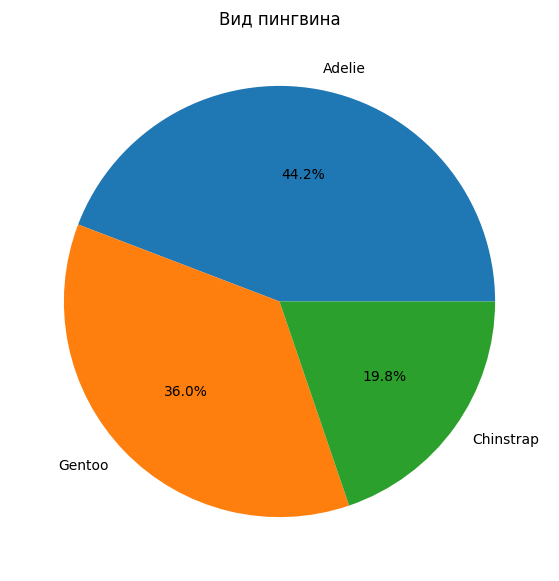

In [23]:
plt.figure(figsize=(12, 7))
plt.pie(species.value_counts(), labels = species.value_counts().index, autopct="%1.1f%%")
plt.title("Вид пингвина")
plt.show()

### Остров

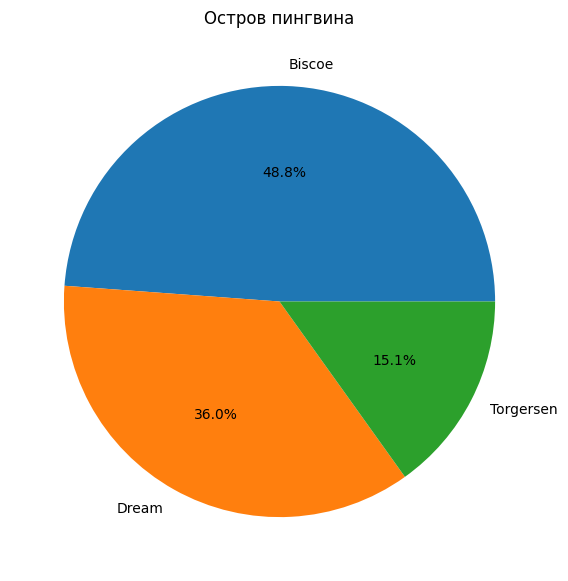

In [24]:
plt.figure(figsize=(12, 7))
plt.pie(island.value_counts(), labels = island.value_counts().index, autopct="%1.1f%%")
plt.title("Остров пингвина")
plt.show()

### Длина клюва в миллиметрах

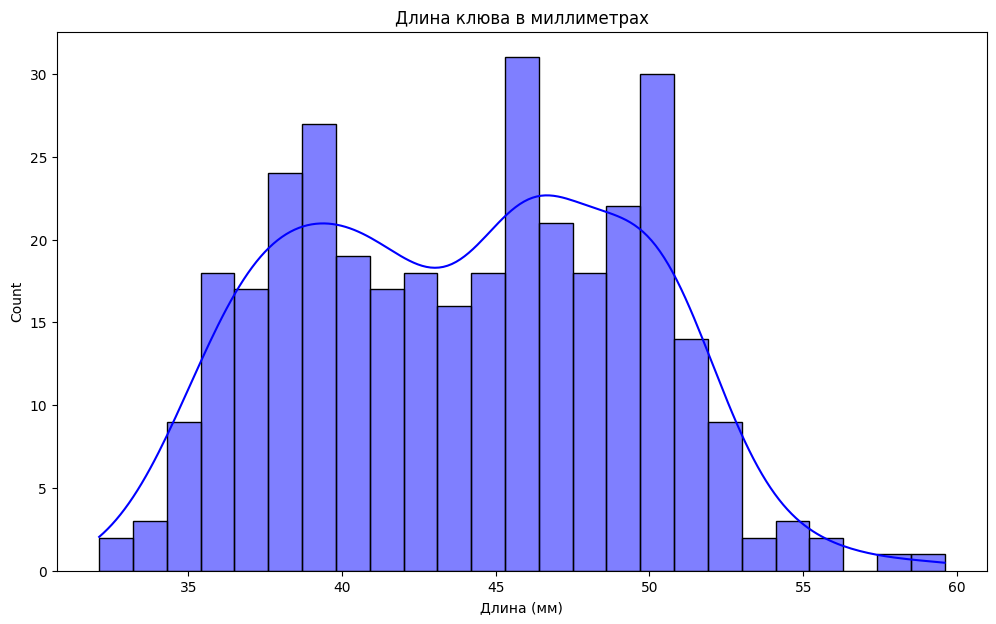

In [25]:
plt.figure(figsize=(12, 7))
sns.histplot(bill_length_mm, bins=25, kde=True, color="blue")
plt.title("Длина клюва в миллиметрах")
plt.xlabel("Длина (мм)")
plt.show()

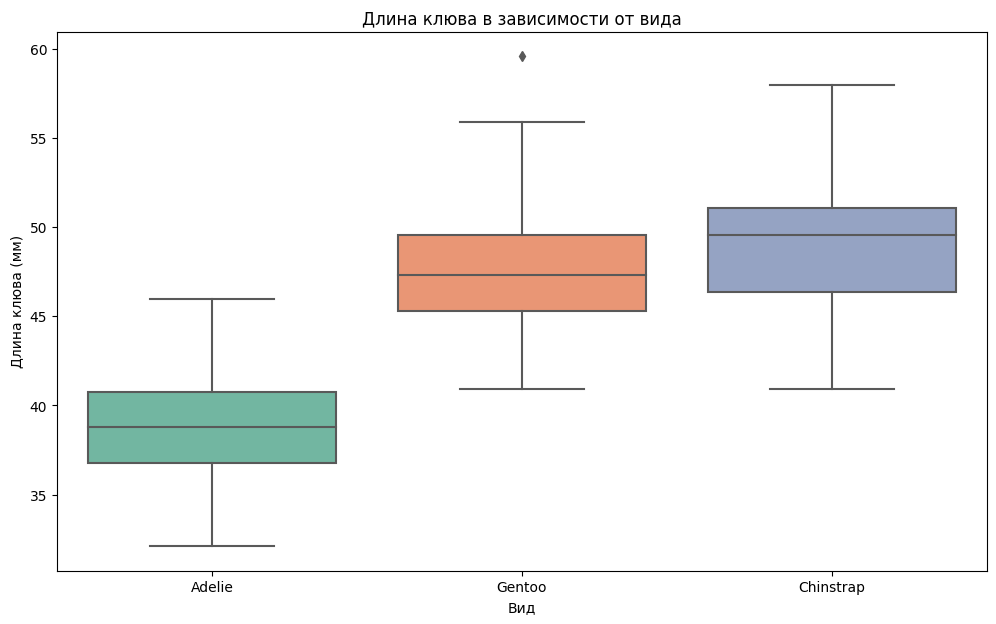

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_origin["species"], y=df_origin["bill_length_mm"], palette="Set2")
plt.title("Длина клюва в зависимости от вида")
plt.xlabel("Вид")
plt.ylabel("Длина клюва (мм)")
plt.show()


### Глубина (высота) клюва в миллиметрах

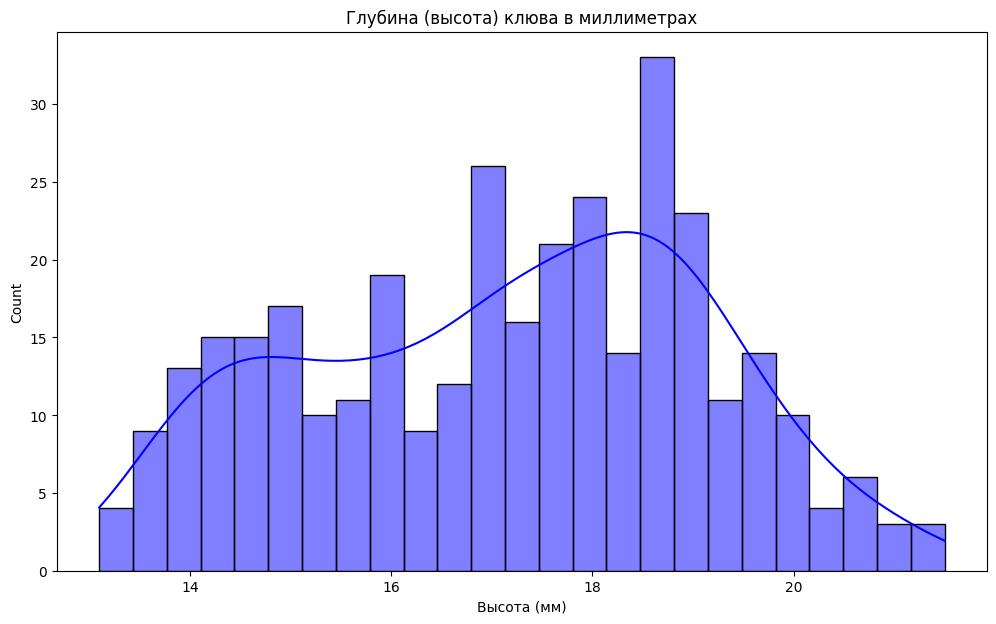

In [27]:
plt.figure(figsize=(12, 7))
sns.histplot(bill_depth_mm, bins=25, kde=True, color="blue")
plt.title("Глубина (высота) клюва в миллиметрах")
plt.xlabel("Высота (мм)")
plt.show()

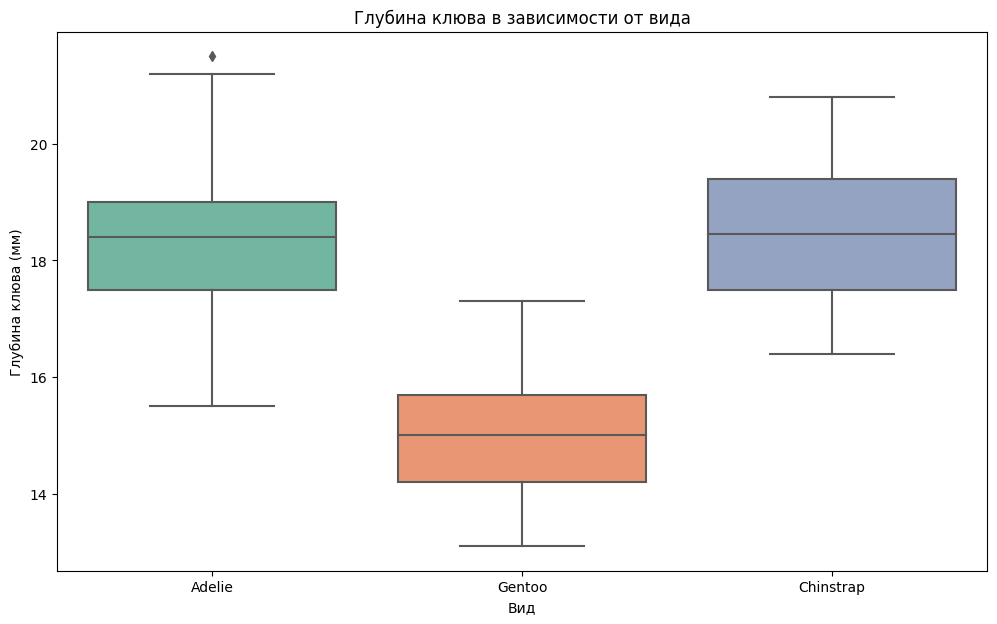

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_origin["species"], y=df_origin["bill_depth_mm"], palette="Set2")
plt.title("Глубина клюва в зависимости от вида")
plt.xlabel("Вид")
plt.ylabel("Глубина клюва (мм)")
plt.show()

### Длина ластов

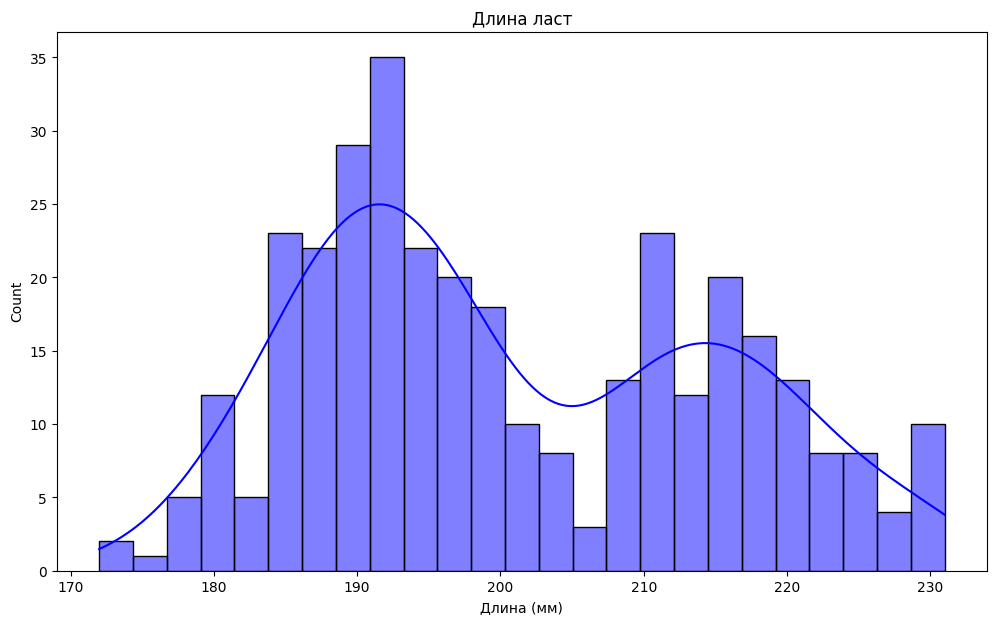

In [29]:
plt.figure(figsize=(12, 7))
sns.histplot(flipper_length_mm, bins=25, kde=True, color="blue")
plt.title("Длина ласт")
plt.xlabel("Длина (мм)")
plt.show()

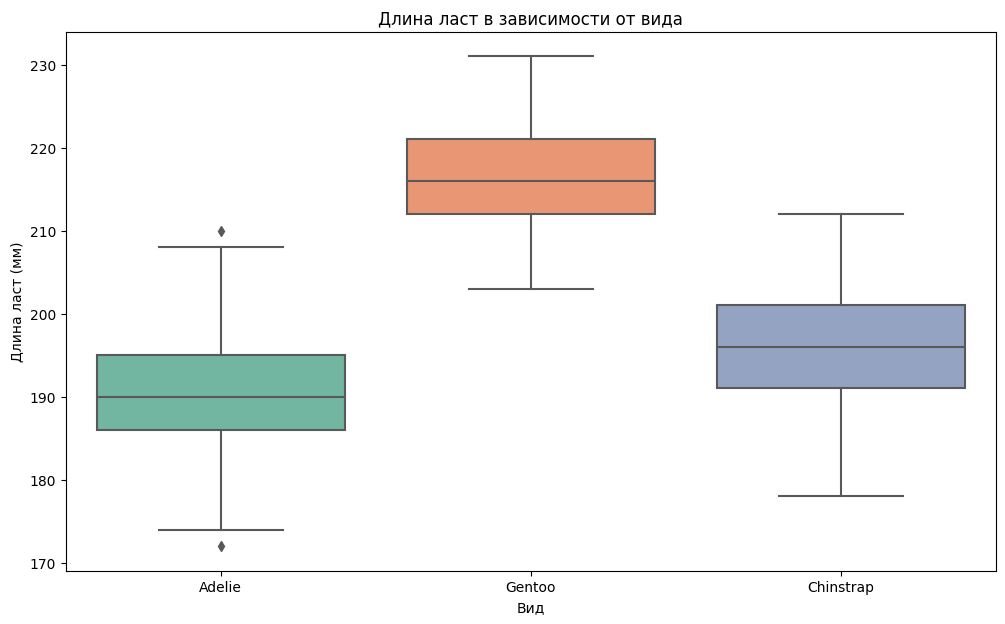

In [30]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_origin["species"], y=df_origin["flipper_length_mm"], palette="Set2")
plt.title("Длина ласт в зависимости от вида")
plt.xlabel("Вид")
plt.ylabel("Длина ласт (мм)")
plt.show()

### Масса тела в граммах

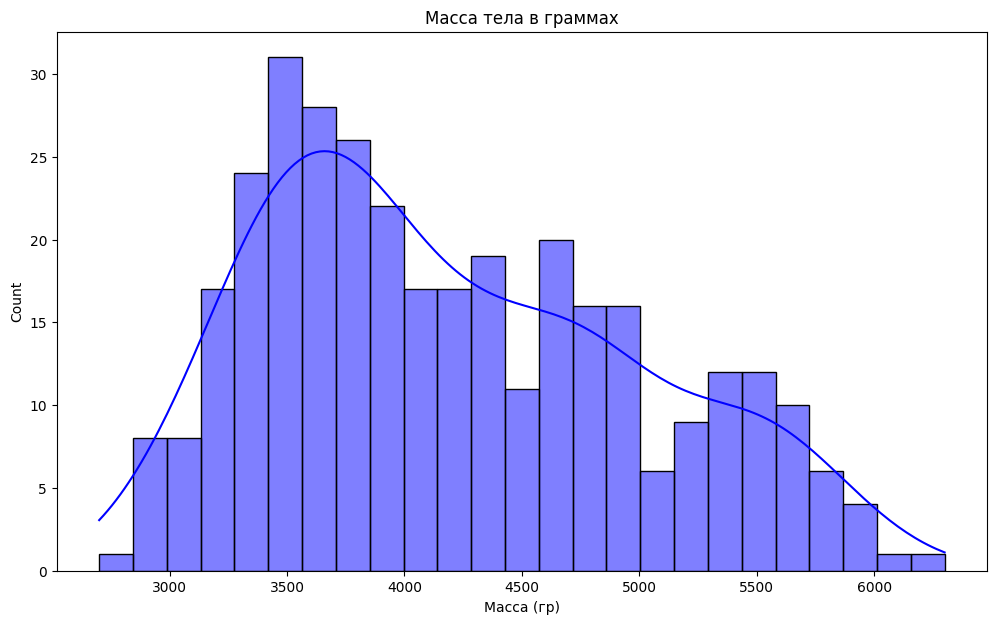

In [31]:
plt.figure(figsize=(12, 7))
sns.histplot(body_mass_g, bins=25, kde=True, color="blue")
plt.title("Масса тела в граммах")
plt.xlabel("Масса (гр)")
plt.show()

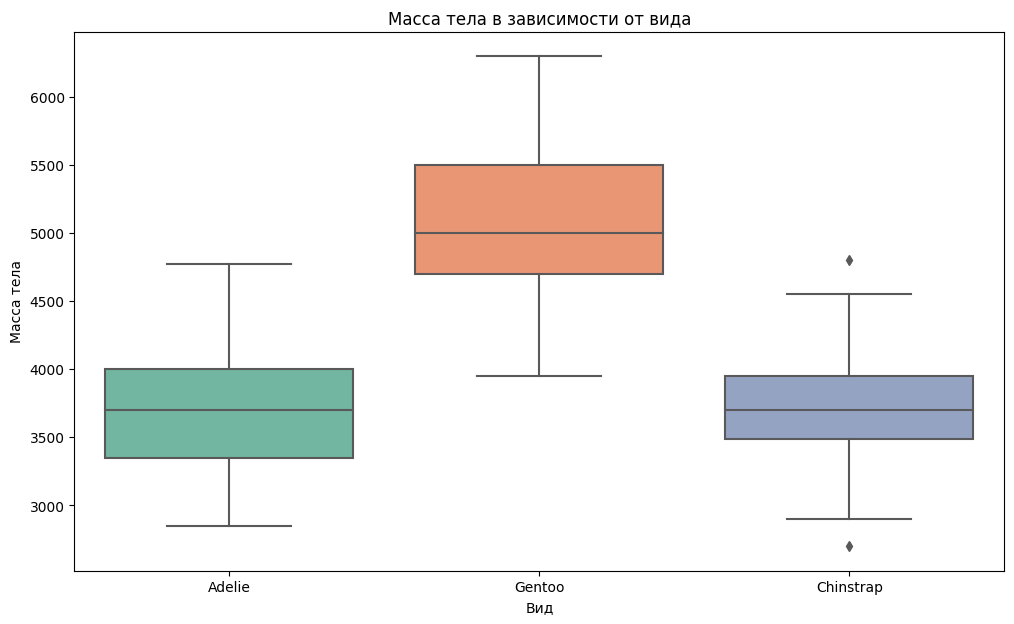

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_origin["species"], y=df_origin["body_mass_g"], palette="Set2")
plt.title("Масса тела в зависимости от вида")
plt.xlabel("Вид")
plt.ylabel("Масса тела")
plt.show()

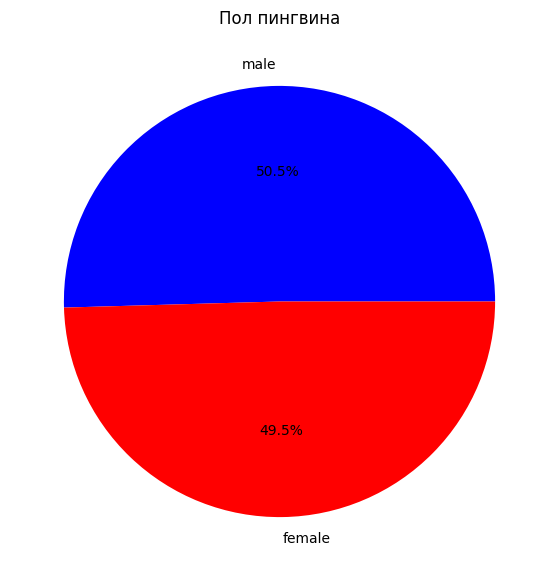

In [33]:
plt.figure(figsize=(12, 7))
plt.pie(sex.value_counts(), labels = sex.value_counts().index, autopct="%1.1f%%", colors = ['blue', 'red'])
plt.title("Пол пингвина")
plt.show()

## 4. Выявление аномалий и выбросов


Все значения меньше Q1 - 1.2 * IQR или больше Q3 + 1.2 * IQR можно считать выбросами/аномалиями.
Q1 - Первый квартиль,
Q3 - Третий квартиль,
IQR - Разница

### Длина клюва в миллиметрах

In [34]:
Q1 = bill_length_mm.quantile(0.25)  # Первый квартиль (25%)
Q3 = bill_length_mm.quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

In [35]:
Q1, Q3

(39.225, 48.5)

In [36]:
outliers_bill_length_mm = df_origin[(bill_length_mm < lower_bound) | (bill_length_mm > upper_bound)]

In [37]:
outliers_bill_length_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


### Глубина (высота) клюва в миллиметрах

In [38]:
Q1 = bill_depth_mm.quantile(0.25)  # Первый квартиль (25%)
Q3 = bill_depth_mm.quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

In [39]:
Q1, Q3

(15.6, 18.7)

In [40]:
outliers_bill_depth_mm = df_origin[(bill_depth_mm  < lower_bound) | (bill_depth_mm  > upper_bound)]

In [41]:
outliers_bill_depth_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


### Длина ластов в миллиметрах

In [42]:
Q1 = flipper_length_mm.quantile(0.25)  # Первый квартиль (25%)
Q3 = flipper_length_mm.quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

In [43]:
Q1, Q3

(190.0, 213.0)

In [44]:
outliers_flipper_length_mm = df_origin[(flipper_length_mm  < lower_bound) | (flipper_length_mm  > upper_bound)]

In [45]:
outliers_flipper_length_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


### Масса тела в граммах






In [46]:
Q1 = body_mass_g.quantile(0.25)  # Первый квартиль (25%)
Q3 = body_mass_g.quantile(0.75)  # Третий квартиль (75%)
IQR = Q3 - Q1  # Межквартильный размах

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

In [47]:
Q1, Q3

(3550.0, 4750.0)

In [48]:
outliers_body_mass_g = df_origin[(body_mass_g  < lower_bound) | (body_mass_g  > upper_bound)]

In [49]:
outliers_body_mass_g

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male


## 5. Исследование взаимосвязей признаков



### Зависимость между весом и Длиной клюва в миллиметрах

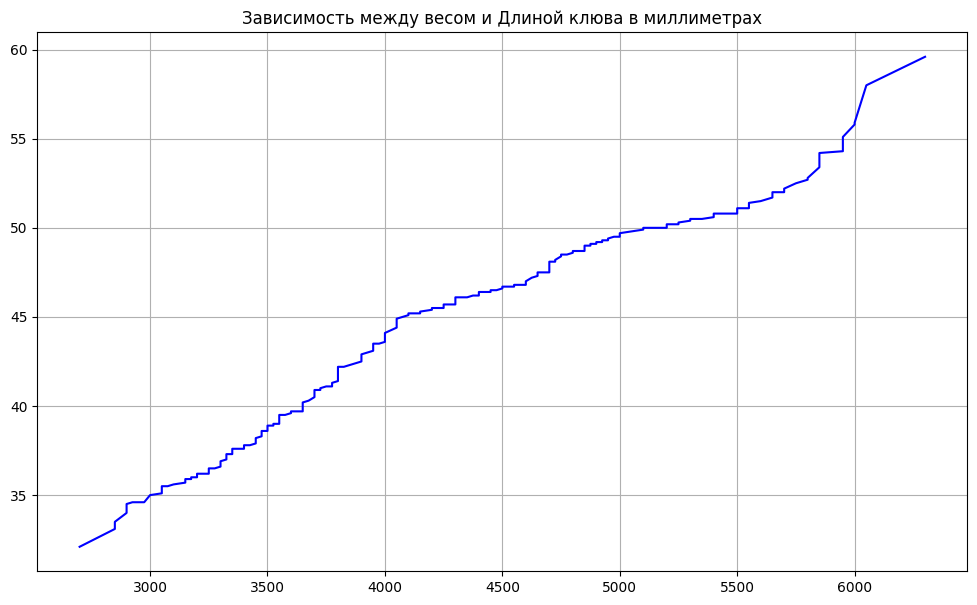

In [50]:
plt.figure(figsize=(12, 7))
plt.plot(body_mass_g.sort_values(), bill_length_mm.sort_values(), linestyle='-', color='b',)
plt.title("Зависимость между весом и Длиной клюва в миллиметрах")
plt.grid()
plt.show()

Зависимость присутствует



### Зависимость между весом и Глибины клюва в миллиметрах




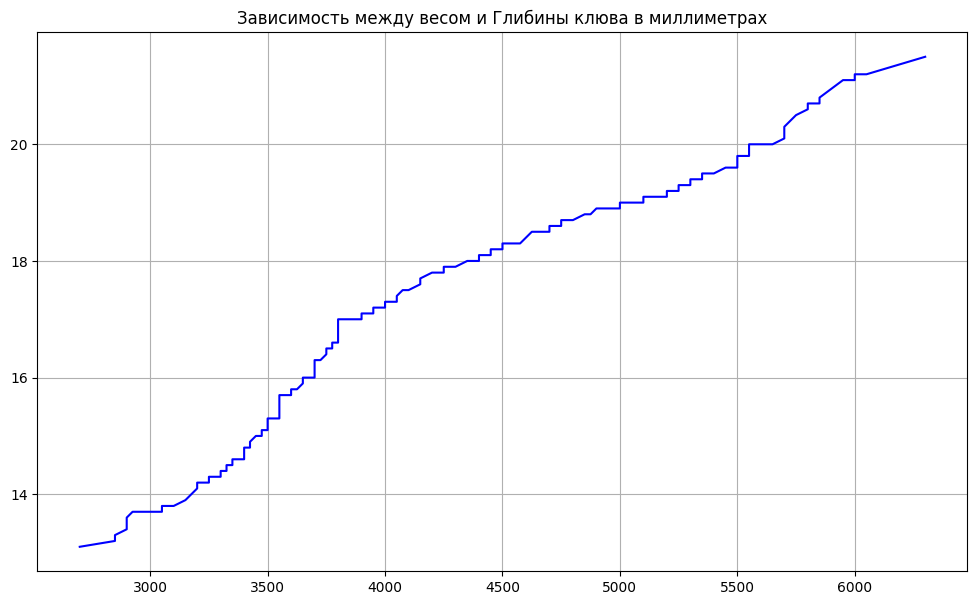

In [51]:
plt.figure(figsize=(12, 7))
plt.plot(body_mass_g.sort_values(), bill_depth_mm.sort_values(), linestyle='-', color='b',)
plt.title("Зависимость между весом и Глибины клюва в миллиметрах")
plt.grid()
plt.show()

Зависимость присутствует




### Зависимость между весом и Длиной ласт

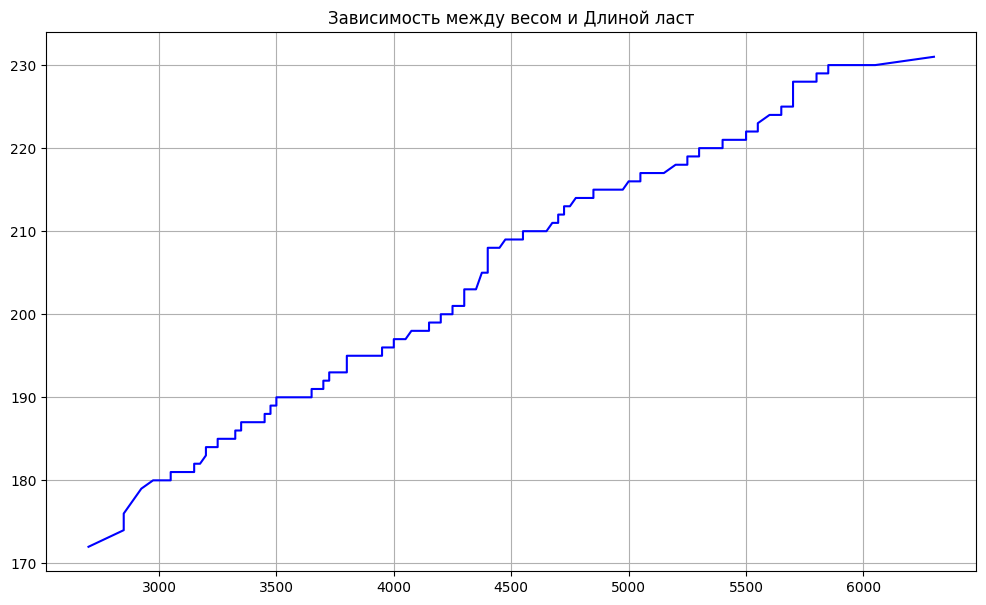

In [52]:
plt.figure(figsize=(12, 7))
plt.plot(body_mass_g.sort_values(), flipper_length_mm.sort_values(), linestyle='-', color='b',)
plt.title("Зависимость между весом и Длиной ласт")
plt.grid()
plt.show()

Зависимость присутствует

Вес коррелирует со всеми признаками

### Зависимость между длиной и глубиной клюва

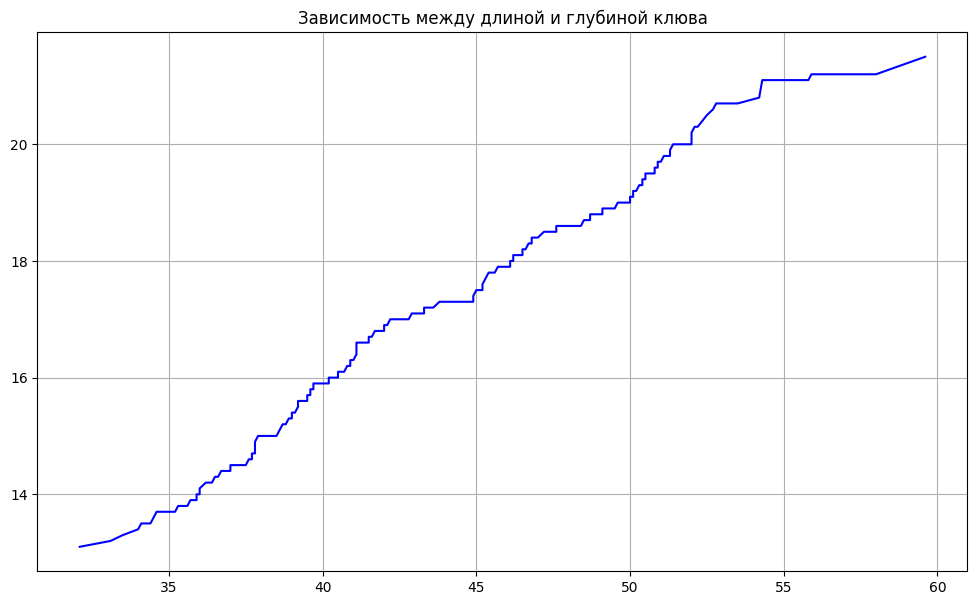

In [53]:
plt.figure(figsize=(12, 7))
plt.plot(bill_length_mm.sort_values(), bill_depth_mm.sort_values(), linestyle='-', color='b',)
plt.title("Зависимость между длиной и глубиной клюва")
plt.grid()
plt.show()

Зависимость присутствует

## 6. Построение тепловой карты корреляций




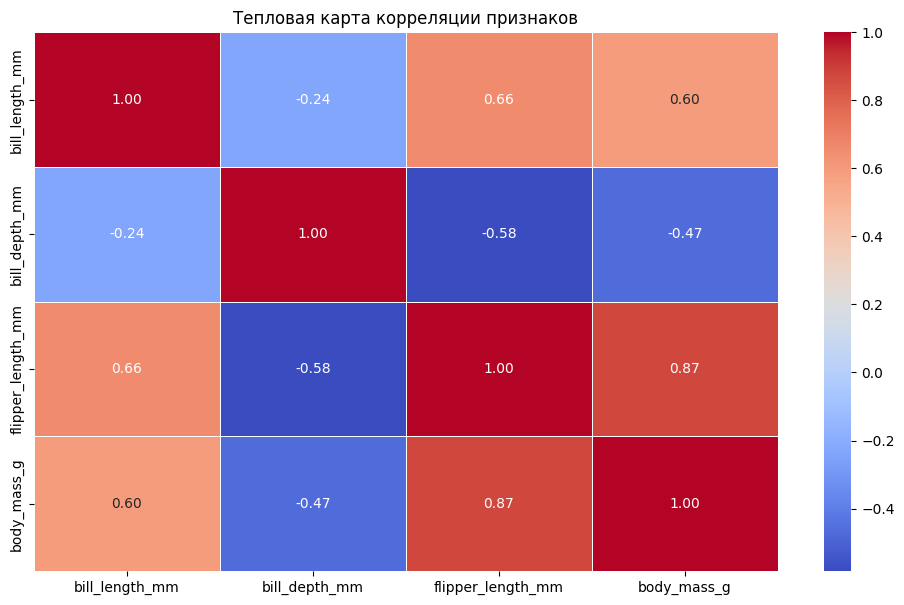

In [54]:
corr_matrix = df_origin.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Тепловая карта корреляции признаков")

plt.show()

## 7. Заполнение пропущенных значений

In [55]:
df_origin.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Длину клюва, Глубину клюва, Длину ласт, Вес, можно заменить на медиану в зависимости от пола

### Замена пропусков для длины клюва

In [56]:
median_bill_length_mm_male = df_origin[df_origin['sex'] == 'male']['bill_length_mm'].median()
median_bill_length_mm_female = df_origin[df_origin['sex'] == 'female']['bill_length_mm'].median()

In [57]:
median_bill_length_mm_male, median_bill_length_mm_female

(46.8, 42.8)

In [58]:
missing_mask = (df_origin["sex"] == "male") & df_origin["bill_length_mm"].isna()
df_origin.loc[missing_mask, "bill_length_mm"] = median_bill_length_mm_male

In [59]:
missing_mask = (df_origin["sex"] == "female") & df_origin["bill_length_mm"].isna()
df_origin.loc[missing_mask, "bill_length_mm"] = median_bill_length_mm_female

In [60]:
missing_mask.sum()

0

In [61]:
df_origin.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Пропущены все значения из строчки, кроме вида и острова, лучше будет удалить эти данные или заменить в соответсвии с этими признаками

In [62]:
df = df_origin.dropna(subset=["bill_length_mm"]).copy()


In [63]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

Пол можно заменить в зависимости от веса и вида

In [64]:
species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [65]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [66]:
median_male_adelie = df[(df["sex"] == "male") & (df["species"] == "Adelie")]["body_mass_g"].median()
median_female_adelie = df[(df["sex"] == "female") & (df["species"] == "Adelie")]["body_mass_g"].median()
median_difference_adelie = (median_male_adelie + median_female_adelie) / 2

In [67]:
median_difference_adelie

3700.0

In [68]:
median_male_gentoo = df[(df["sex"] == "male") & (df["species"] == "Gentoo")]["body_mass_g"].median()
median_female_gentoo = df[(df["sex"] == "female") & (df["species"] == "Gentoo")]["body_mass_g"].median()
median_difference_gentoo = (median_male_gentoo + median_female_gentoo) / 2

In [69]:
median_difference_gentoo

5100.0

In [70]:
median_male_chinstrap = df[(df["sex"] == "male") & (df["species"] == "Chinstrap")]["body_mass_g"].median()
median_female_chinstrap = df[(df["sex"] == "female") & (df["species"] == "Chinstrap")]["body_mass_g"].median()
median_difference_chinstrap = (median_male_chinstrap + median_female_chinstrap) / 2

In [71]:
median_difference_chinstrap

3750.0

In [72]:
median_differences = {
    "Gentoo": median_difference_gentoo,
    "Adelie": median_difference_adelie,
    "Chinstrap": median_difference_chinstrap
}

In [73]:
df.loc[df["sex"].isna(), "sex"] = df.apply(
    lambda row: "female" if row["body_mass_g"] < median_differences[row["species"]] else "male",
    axis=1
)

## 8. Демонстрация результатов заполнения

In [74]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [75]:
sex = df['sex']

In [76]:
sex.value_counts().sum()

342

In [77]:
sex.value_counts()

sex
female    172
male      170
Name: count, dtype: int64

## 9. Применение нормализации данных



In [78]:
scaler = MinMaxScaler()
numeric_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [79]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female
5,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.593220,0.361111,male
340,Chinstrap,Dream,0.414545,0.595238,0.508475,0.194444,female
341,Chinstrap,Dream,0.636364,0.607143,0.355932,0.298611,male
342,Chinstrap,Dream,0.680000,0.702381,0.644068,0.388889,male


### Длина клюва в миллиметрах

In [80]:
bill_length_mm = df['bill_length_mm']

In [81]:
bill_length_mm.min(), bill_length_mm.max(), bill_length_mm.mean(), bill_length_mm.median()

(0.0, 0.9999999999999998, 0.42988835725677826, 0.4490909090909091)

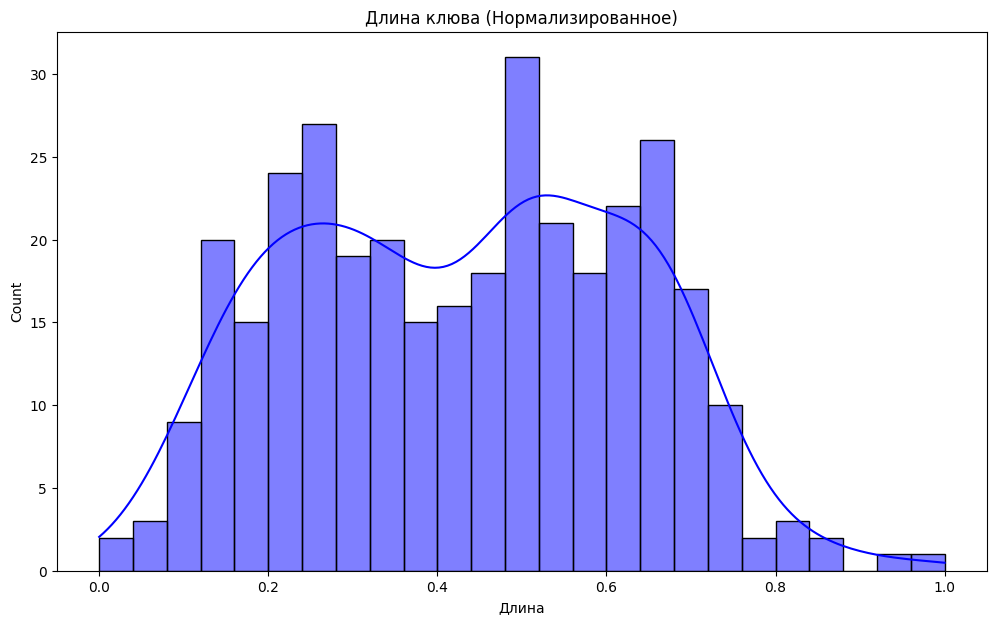

In [82]:
plt.figure(figsize=(12, 7))
sns.histplot(bill_length_mm, bins=25, kde=True, color="blue")
plt.title("Длина клюва (Нормализированное)")
plt.xlabel("Длина")
plt.show()

### Масса тела в граммах



In [83]:
body_mass_g = df['body_mass_g']

In [84]:
body_mass_g.min(), body_mass_g.max(), body_mass_g.mean(), body_mass_g.median()

(0.0, 1.0, 0.41715399610136455, 0.375)

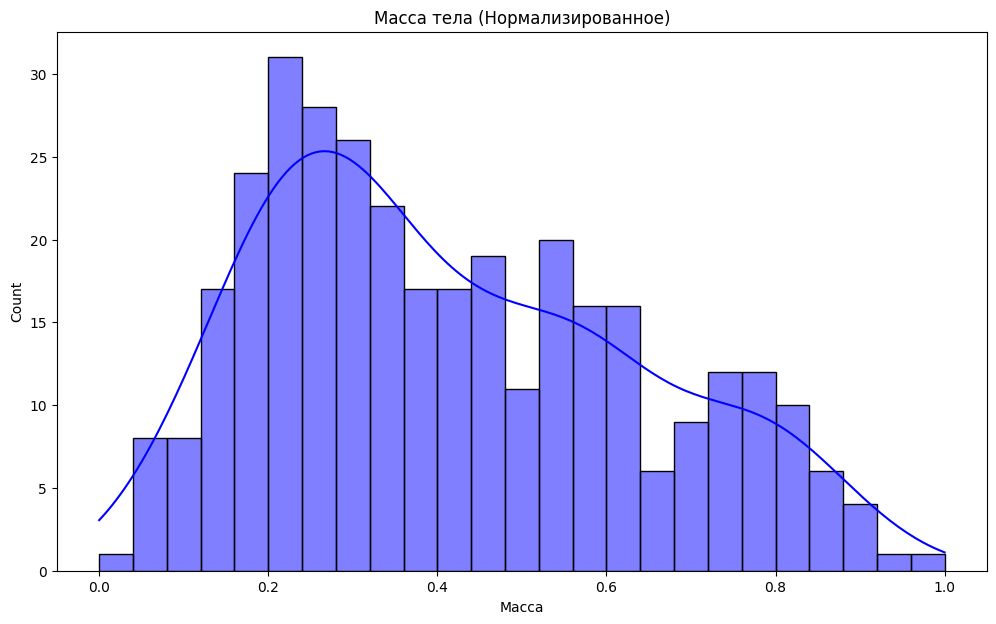

In [85]:
plt.figure(figsize=(12, 7))
sns.histplot(body_mass_g, bins=25, kde=True, color="blue")
plt.title("Масса тела (Нормализированное)")
plt.xlabel("Масса")
plt.show()

## 10. Кодирование категориальных признаков



### LabelEncoder

In [86]:
encoder = LabelEncoder()

df["sex"] = encoder.fit_transform(df["sex"])
df["island"] = encoder.fit_transform(df["island"])
df["species"] = encoder.fit_transform(df["species"])

In [87]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
4,0,2,0.167273,0.738095,0.355932,0.208333,0
5,0,2,0.261818,0.892857,0.305085,0.263889,1


### One-Hot Encoding (OHE)

In [88]:
df_encoded = pd.get_dummies(df, columns=["sex", "island", "species"])

In [89]:
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_0,sex_1,island_0,island_1,island_2,species_0,species_1,species_2
0,0.254545,0.666667,0.152542,0.291667,False,True,False,False,True,True,False,False
1,0.269091,0.511905,0.237288,0.305556,True,False,False,False,True,True,False,False
2,0.298182,0.583333,0.389831,0.152778,True,False,False,False,True,True,False,False
4,0.167273,0.738095,0.355932,0.208333,True,False,False,False,True,True,False,False
5,0.261818,0.892857,0.305085,0.263889,False,True,False,False,True,True,False,False


## 11. Применение метода главных компонент



In [90]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

In [91]:
df_pca.head()

,PC1,PC2
0,-0.683319,0.599505
1,-0.701612,-0.775364
2,-0.710100,-0.769270
3,-0.751641,-0.758540
4,-0.699730,0.639248


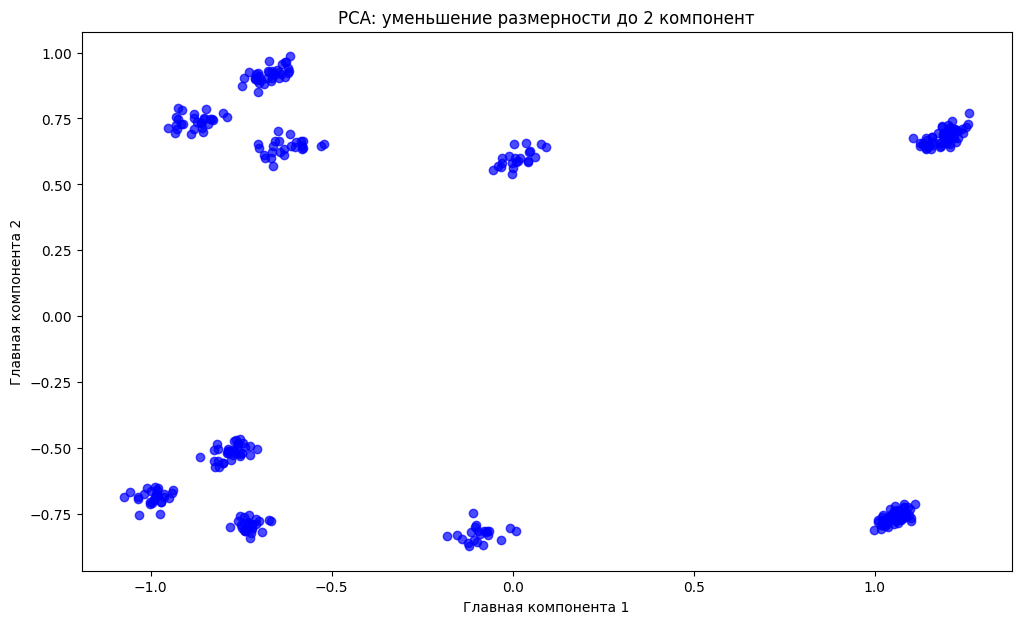

In [92]:
plt.figure(figsize=(12, 7))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, color = 'blue')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("PCA: уменьшение размерности до 2 компонент")
plt.show()